Welcome to the LPI Analysis notebook. This notebook has been created by Corey Kiyoshi Clippinger of Kos-2. In this notebook we will go through a basic analysis of the Language Proficiency Interview data collected by Peace Corps Kosovo's TEFL volunteers. For a brief tutorial of how Juptyer notebook work please see https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.sKIKXig

To start lets load our data into the notebook. Please note that for this all to work, we need to have our CSV file in a tabular format meaning that each row contains one student result and each column records their information ex. name, gender, age, municipality, LPI score, etc. 

The kernel of code will provide an example. click on the next box (the kernel) and press the play button to run the code. 

In [2]:
import pandas as pd
import numpy as np

example = pd.DataFrame(data=np.array([['George', 'Male', '14','Novice', 'Pristina'], 
                                    ['Mary', 'Female', '14', 'Intermediate', 'Gjilan'],
                                    ['Jimmy','Male', '15', 'Novice', 'Kamenica'],
                                    ['Judy', 'Female', '13', 'Advanced', 'Peja']],dtype=str), 
                                         columns=['name', 'gender', 'age', 'rating', 'municipality'])
                                                                                    
print example

     name  gender age        rating municipality
0  George    Male  14        Novice     Pristina
1    Mary  Female  14  Intermediate       Gjilan
2   Jimmy    Male  15        Novice     Kamenica
3    Judy  Female  13      Advanced         Peja


Alright so lets load up our actual data. First input the filepath for the formated and complete CSV file after filepath = ' ' 

You should be inputing something like:

filepath = '/Users/Jimmy/Desktop/LPI results.csv' 

**Make sure you type your filepath in like I did above, computers are very unsympatheic listeners so leaving out the:
" ' / .csv" bits will result in a scary error popup 

If using a CSV file make sure the filepath ends with .csv if it's excel .xls, when in doubt look at the file name on your computer to be certain

you'll see down bellow a bit of code that looks like this:

lpidf = pd.read_csv(filepath, index_col=0)

If you are loading up a CSV file **leave this alone**

If you are loading up a xls file or xlsx **use the bellow code instead 

lpidf = pd.read_excel(filepath, sheetname=0, index_col=0)

Just copy which ever code you are supposed to use and then paste it over the code you need to replace

In [1]:
filepath = '/Users/Coreyclip/Desktop/Peace Corps/LPI Project/Data Sheets/Master LPI sheet.csv'


In [2]:
import pandas as pd
import numpy as np 

try:
    lpidf = pd.read_csv(filepath, index_col=0)
    print "All good... hopefully"
except IOError:
    print "double check file path \n\nand no you did not load the data correctly"

All good... hopefully


Lets take a look at our data to make sure that everything is what we expect. 

The next line of code will give us a basic read out of the columns we have in the data and the number of observations in each. While not critical it's probably important that our number of entries equals the number of *Names*, *Ages*, and *Ratings*, for example. the other variables are likely not going to equal the total number of observations as the methodologies of the LPI data collection has changed overtime so in some samples *Internet Access* was collected and in others it wasn't 

For those with some exposure to computer programming you'll notice that the data types of each variable is also provided

In [3]:
lpidf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257 entries, Selma Hasani to Ylberina Ibriqi
Data columns (total 23 columns):
Age                                        2239 non-null float64
Class                                      443 non-null object
Comments                                   82 non-null object
English Speaking family member             271 non-null float64
Families receiving war pensions            1764 non-null float64
Gender                                     2256 non-null object
Grade                                      493 non-null float64
Internet Access                            169 non-null float64
Listens to English outside of school       68 non-null float64
Rating                                     2242 non-null object
Reads English outside of school            65 non-null float64
Speaks English outside of School           26 non-null float64
Taking Private Courses                     306 non-null float64
Volunteer                                  2257 

Ok lets look at some summary statistics of our data, run the next line of code to get summary statistics on the ages of the students in our sample

## Student Ages

In [4]:
print "***Summary stats*** \n \n", lpidf['Age'].describe(), "\n"
print "Value Counts\nage, ratio of sample \n \n", 
print lpidf['Age'].value_counts(sort=False,normalize=True, ascending=False)

***Summary stats*** 
 
count    2239.000000
mean       13.825368
std         1.823136
min         9.000000
25%        12.000000
50%        14.000000
75%        15.000000
max        20.000000
Name: Age, dtype: float64 

Value Counts
age, ratio of sample 
 
14.0    0.225994
13.0    0.192943
12.0    0.160786
17.0    0.076820
15.0    0.141134
16.0    0.090665
18.0    0.017865
11.0    0.070567
19.0    0.001787
10.0    0.020545
9.0     0.000447
20.0    0.000447
Name: Age, dtype: float64


Would you kindly run the next cell to get a visualizations of our students' ages

//anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
//anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


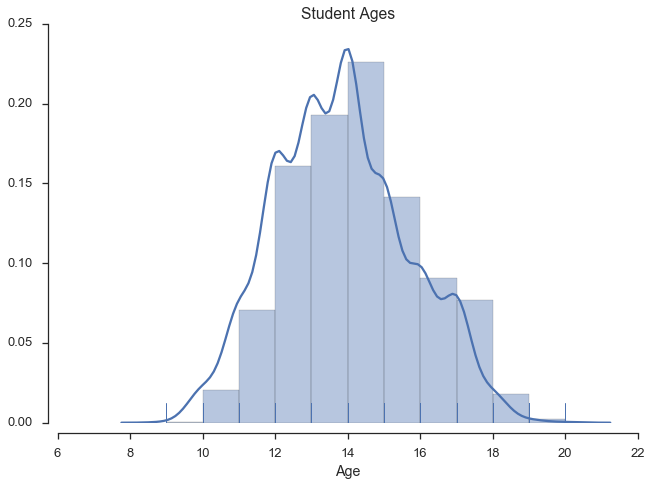

In [5]:
%matplotlib inline
import seaborn as sns
import ggplot
from ggplot import aes
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("ticks")
sns.set_context("talk")

sns.distplot(lpidf['Age'], kde=True, rug=True, bins=[9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20])
plt.title("Student Ages")
sns.despine(offset=10, trim=False)




The next cell will produce violin plots (a variation of the boxplot) broken down by gender

Would you kindly run the cell

** A few notes on the next vizualization **
* White dot represents the average 
* The larger the blob the more students are of a particular age 
* The thick part of the line is the 25th to 75th percentile aka the middle 50% of the data *

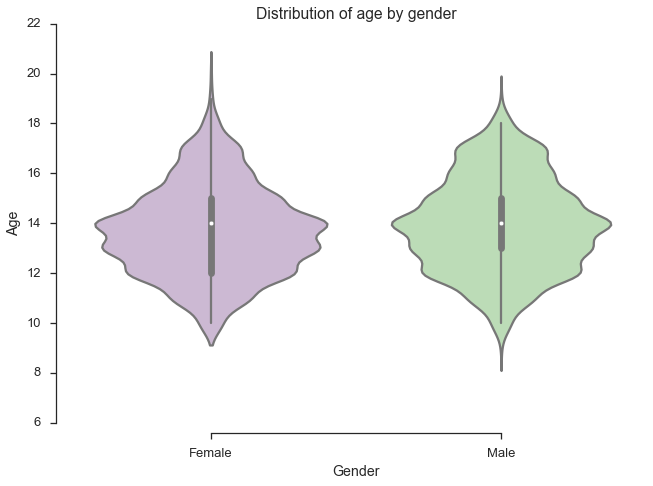

In [17]:
sns.set(style="ticks")
sns.set_context("talk")
sns.violinplot(x="Gender", y="Age", data=lpidf,  palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('Distribution of age by gender')


# Gender 

Lets start out by getting an idea of the distribution of 
how many boys and girls we have in our sample run the next cell to 
get a breakdown of the proportion of boys and girls

In [18]:
print "***Ratio of Male and Female*** \n \n" , lpidf['Gender'].value_counts(normalize=True)

***Ratio of Male and Female*** 
 
Male      0.516844
Female    0.483156
Name: Gender, dtype: float64


Lets do a histogram to represent this information and break it down by municipality

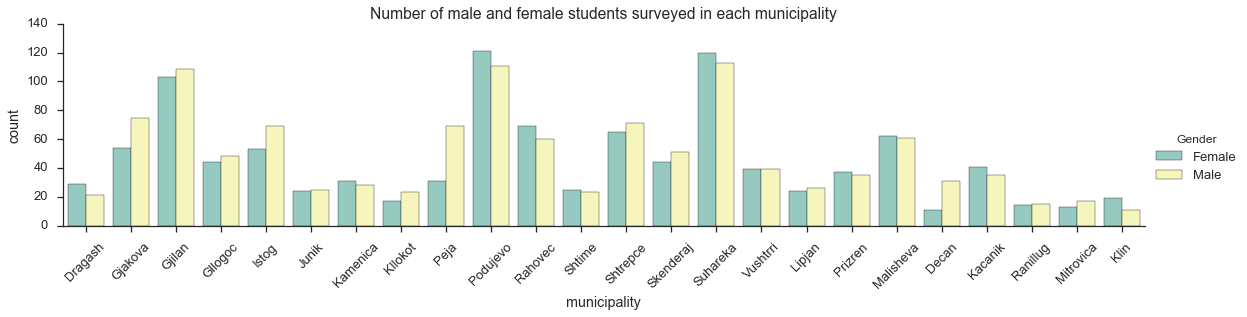

In [34]:
sns.set_context("talk")
g = sns.factorplot('municipality', hue='Gender',aspect=4, kind="count", data=lpidf, palette="Set3")
g.set_xticklabels(rotation=45)
plt.title('Number of male and female students surveyed in each municipality')

## LPI Rating ##

Alright lets move on to looking at our LPI ratings would you kindly run the bellow cell to 
get a few cross tabulations of LPI rating by age, gender, internet access, etc. 

Just for reference a cross tabulation is very similar to an excel pivot table. In the table bellow student ages are shown on the left hand column and LPI ratings in the top row. Each row represents a specific age and the number where that age matches a specific rating, the number represents the number of students matching the criteria in the row and column. In the example bellow there is one Advanced student at age 13, one Intermediate student at age 14, And a total of 2 Novice students for instance. 

In [10]:

print 'Example \n\n', example

print '\n\n', pd.crosstab(example['age'], example['rating'], margins=True)

Example 

     name  gender age        rating municipality
0  George    Male  14        Novice     Pristina
1    Mary  Female  14  Intermediate       Gjilan
2   Jimmy    Male  15        Novice     Kamenica
3    Judy  Female  13      Advanced         Peja


rating  Advanced  Intermediate  Novice  All
age                                        
13             1             0       0    1
14             0             1       1    2
15             0             0       1    1
All            1             1       2    4


In [48]:
print "***crosstab of LPI rating and age*** \n\n", 
print pd.crosstab(lpidf['Age'], lpidf['Rating'], margins=True)
print "\n\n ***crosstab of LPI rating and gender***\n\n", 
print pd.crosstab(lpidf['Gender'], lpidf['Rating'], margins=True)
print "\n\n ***crosstab of LPI rating and internet acces***\n\n"
print pd.crosstab(lpidf['Internet Access'], lpidf['Rating'], margins=True)
print "\n\n ***crosstab of LPI rating and Private courses***\n\n" 
print pd.crosstab(lpidf['Taking Private Courses'], lpidf['Rating'], margins=True)
print "\n\n***crosstab of LPI rating and school type*** \n\n"
print pd.crosstab(lpidf['school_type'], lpidf['Rating'], margins=True)
print "\n\n***crosstab of LPI rating and English speaking family member*** \n\n", 
print pd.crosstab(lpidf['English Speaking family member'], lpidf['Rating'], margins=True)

***crosstab of LPI rating and age*** 

Rating  Advanced  Intermediate  N/a  Novice   All
Age                                              
9.0            0             0    0       1     1
10.0           0             5    9      31    45
11.0           5            20   16     117   158
12.0          12            97   47     198   354
13.0          23           117   46     245   431
14.0          46           175   30     251   502
15.0          39            89   21     164   313
16.0          17            56    7     123   203
17.0          16            59    4      93   172
18.0           2            18    0      20    40
19.0           0             1    0       3     4
20.0           0             0    0       1     1
All          160           637  180    1247  2224


 ***crosstab of LPI rating and gender***

Rating  Advanced  Intermediate  N/a  Novice   All
Gender                                           
Female       101           374   61     554  1090
Male          60 

Helpful? Maybe or maybe not, typically our brains have an easier time processing numerical information visually like in the graphs above but sometimes simple tables like the ones above can show us some interesting points. Also please note that you may notice that certain columns may not add up to the total number of observations in the dataset. This is simply because in many cases we have missing data from certain observations and the program is just ignoring these datapoints. 

if you would like to make your own crosstabs you can set the *rows* and *columns* variables bellow to different variables from the dataset and run the cell to produce your own crosstabs make sure you type within the " " **like this:** "Age" 


In [11]:
columns = "Grade"
rows = "Rating"

print pd.crosstab(lpidf[rows], lpidf[columns], margins=True)

Grade         6.0  7.0  8.0  9.0  10.0  11.0  12.0  All
Rating                                                 
Advanced        0    3    6    4     4     1     2   20
Intermediate    0    9   32   34    15    22    29  141
N/a             3   10   12    8    10     0     0   43
Novice         15   56   65   46    39    28    40  289
All            18   78  115   92    68    51    71  493


Ok lets move on to visualizing the LPI Ratings, would you kindly run the next cell

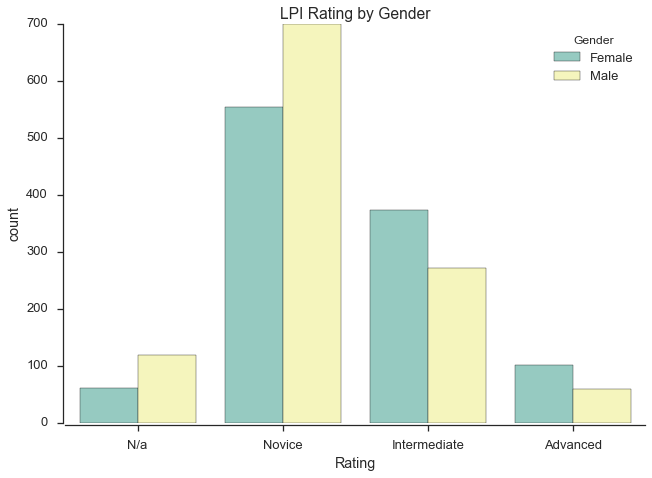

In [51]:
sns.set_context("talk")
sns.countplot(x='Rating', hue='Gender',
              order=['N/a', 'Novice', 'Intermediate', 'Advanced'], data=lpidf, palette="Set3")
sns.despine(offset=2, trim=False)
plt.title('LPI Rating by Gender')


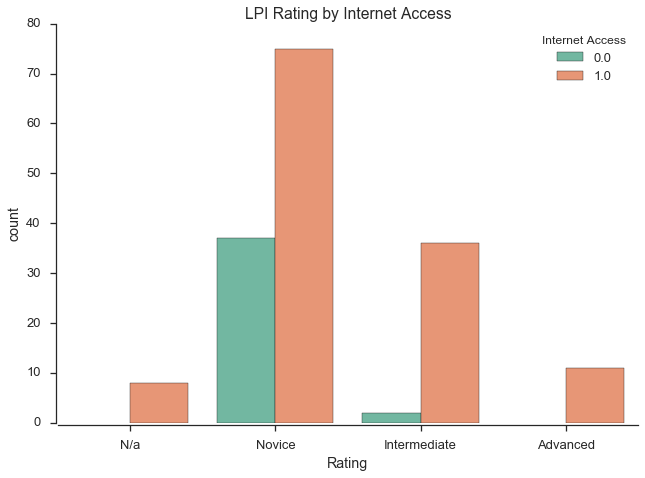

In [52]:
sns.countplot(x='Rating', hue='Internet Access',
              order=['N/a', 'Novice', 'Intermediate', 'Advanced'], data=lpidf, palette="Set2")
sns.despine(offset=2, trim=False)
plt.title('LPI Rating by Internet Access')


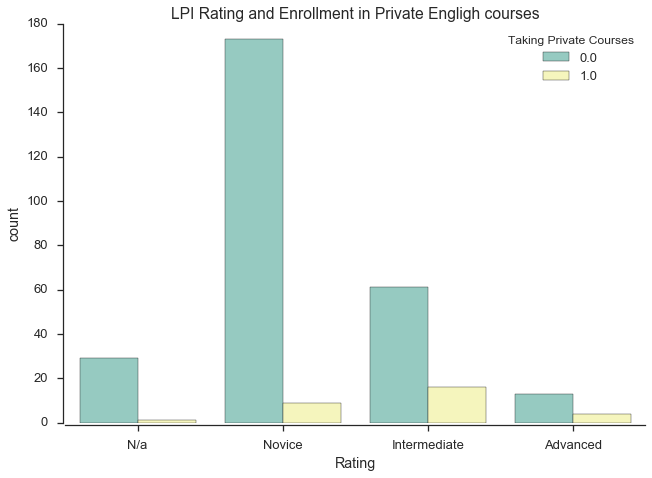

In [53]:
sns.countplot(x='Rating', hue='Taking Private Courses', 
              order=['N/a', 'Novice', 'Intermediate', 'Advanced'], data=lpidf, palette="Set3")
sns.despine(offset=2, trim=False)
plt.title('LPI Rating and Enrollment in Private Engligh courses')


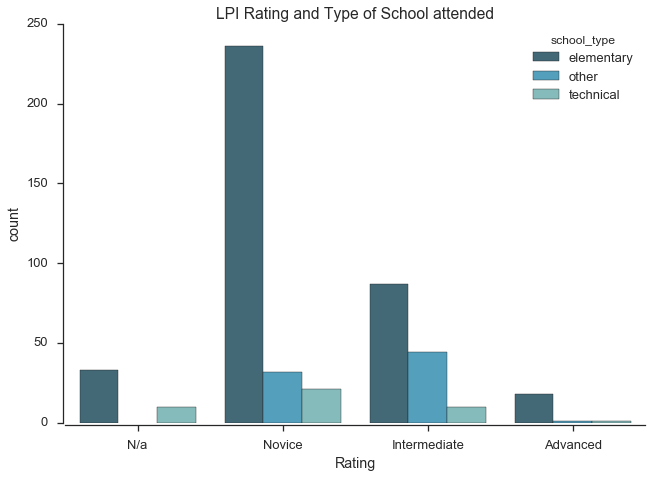

In [12]:
sns.countplot(x='Rating', hue='school_type', 
              order=['N/a', 'Novice', 'Intermediate', 'Advanced'], data=lpidf, palette="GnBu_d")
sns.despine(offset=2, trim=False)
plt.title('LPI Rating and Type of School attended')

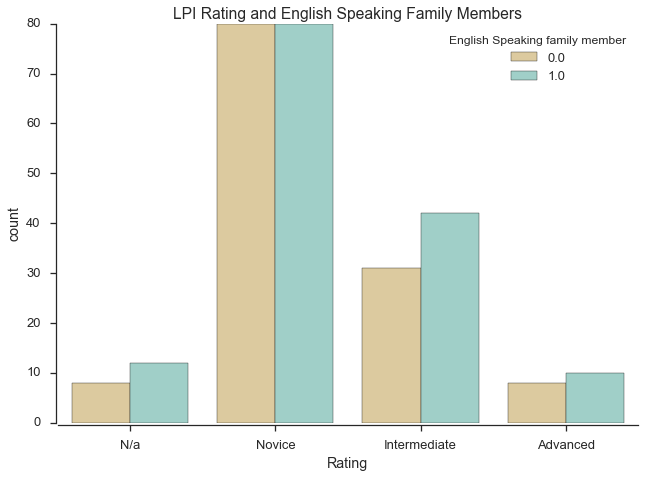

In [14]:
sns.countplot(x='Rating', hue='English Speaking family member',
              order=['N/a', 'Novice', 'Intermediate', 'Advanced'], data=lpidf, palette="BrBG")
sns.despine(offset=2, trim=False)
plt.title('LPI Rating and English Speaking Family Members')


Ok so now lets go ahead and start digging into what factors could be influencing student scores on the LPI

Would you kindly run the next cell, you'll see graph where the large dots represent the **average** age of a student
with a particular LPI score. The lines extending from the dot represent the **range** of student ages for a particular LPI score.  

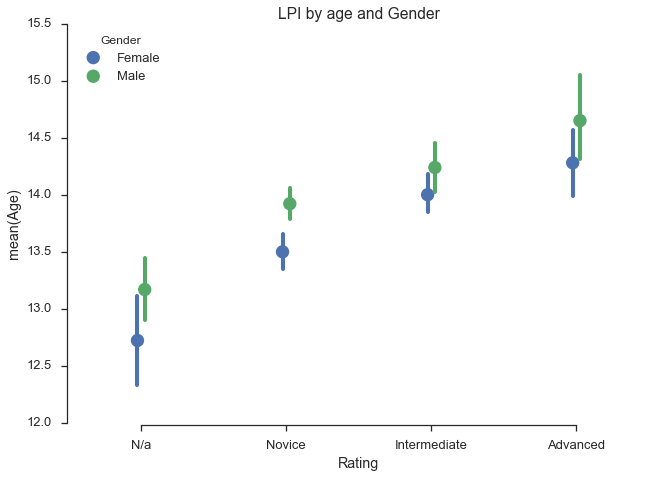

In [15]:
from numpy import median
sns.pointplot(x='Rating', y='Age', dodge=True, hue='Gender',
              join=False, data=lpidf, pallette='BrBG',
             order=['N/a', 'Novice', 'Intermediate', 'Advanced']) 
sns.despine(offset=2, trim=True)
plt.title('LPI by age and Gender')

This next few graphs will show a series of linear models between LPI score and the various factors we've collected, though in order to make the mathematical bits and pieces work, we have to convert our LPI rankings and yes/no questions to numerical rankings. see the explanations bellow: 

* 1 - N/a
* 2 - Novice
* 3 - Intermediate
* 4 - Advanced
For the LPI rankings
*because of the way LPI rankings work, one cannot actually accurately model mathematically the progression of LPI scores as 0 being N/a and 1 - Novice, 2 - Intermediate, etc. Because as many of you should know the threshold for a student moving from N/a to Novice is much lower than a Intermediate student moving to Advanced, so instead I've decided that it is a safer bet to simply represent the LPI scores as dummy variables. The next cell will unravel the 'Rating' column and create a column for every LPI rating for each student record. The column with the Rating that the student has will have a 1 in it and the others will have 0. 

For the yes/no questions
* 1 - yes
* 0 - no


In [19]:
lpidf = lpidf.replace(to_replace = 'yes', value=1) 
lpidf = lpidf.replace(to_replace = 'no', value= 0) 

lpidf = lpidf.replace(to_replace = 'Yes', value=1) 
lpidf = lpidf.replace(to_replace = 'No', value= 0) 



lpidf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, nikola, kitanović to Leonora Goshi
Data columns (total 17 columns):
Age                                     127 non-null int64
Class                                   127 non-null int64
Comments                                38 non-null float64
English Speaking family member          100 non-null float64
Gender                                  127 non-null object
Grade                                   127 non-null int64
Internet Access                         68 non-null float64
Listens to English outside of school    26 non-null float64
Rating                                  127 non-null object
Reads English outside of school         23 non-null float64
Speaks English outside of School        26 non-null float64
Taking Private Courses                  121 non-null float64
Volunteer                               127 non-null object
cohort                                  127 non-null int64
date_received                       